# Capstone Project 1: MuscleHub AB Test

## Step 1: Get started with SQL

Like most businesses, Janet keeps her data in a SQL database.  Normally, you'd download the data from her database to a csv file, and then load it into a Jupyter Notebook using Pandas.

For this project, you'll have to access SQL in a slightly different way.  You'll be using a special Codecademy library that lets you type SQL queries directly into this Jupyter notebook.  You'll have to pass each SQL query as an argument to a function called `sql_query`.  Each query will return a Pandas DataFrame.  Here's an example:

In [1]:
# This import only needs to happen once, at the beginning of the notebook
from codecademySQL import sql_query

In [2]:
# Here's an example of a query that just displays some data
sql_query('''
SELECT *
FROM visits
LIMIT 5
''')

,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [3]:
# Here's an example where we save the data to a DataFrame
df = sql_query('''
SELECT *
FROM applications
LIMIT 5
''')

In [4]:
df

,index,first_name,last_name,email,gender,application_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


## Step 2: Get your dataset

Let's get started!

Janet of MuscleHub has a SQLite database, which contains several tables that will be helpful to you in this investigation:
- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

Use the space below to examine each table.

In [5]:
# Examine visits here
df_visits = sql_query('''
SELECT *
FROM visits
''')
print df_visits.shape
print df_visits.dtypes
df_visits.head(5)

(6000, 6)
index          int64
first_name    object
last_name     object
email         object
gender        object
visit_date    object
dtype: object


,index,first_name,last_name,email,gender,visit_date
0,0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [6]:
# Examine fitness_tests here
df_fitness_tests = sql_query('''
SELECT *
FROM fitness_tests
''')
print df_fitness_tests.shape
print df_fitness_tests.dtypes
df_fitness_tests.head(5)

(2500, 6)
index                 int64
first_name           object
last_name            object
email                object
gender               object
fitness_test_date    object
dtype: object


,index,first_name,last_name,email,gender,fitness_test_date
0,0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [7]:
# Examine applications here
df_applications = sql_query('''
SELECT *
FROM applications
''')
print df_applications.shape
print df_applications.dtypes
df_applications.head(5)

(575, 6)
index                int64
first_name          object
last_name           object
email               object
gender              object
application_date    object
dtype: object


,index,first_name,last_name,email,gender,application_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [8]:
# Examine purchases here
df_purchases = sql_query('''
SELECT *
FROM purchases
''')
print df_purchases.shape
print df_purchases.dtypes
df_purchases.head(5)

(450, 6)
index             int64
first_name       object
last_name        object
email            object
gender           object
purchase_date    object
dtype: object


,index,first_name,last_name,email,gender,purchase_date
0,0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


We'd like to download a giant DataFrame containing all of this data.  You'll need to write a query that does the following things:

1. Not all visits in  `visits` occurred during the A/B test.  You'll only want to pull data where `visit_date` is on or after `7-1-17`.

2. You'll want to perform a series of `LEFT JOIN` commands to combine the four tables that we care about.  You'll need to perform the joins on `first_name`, `last_name`, and `email`.  Pull the following columns:


- `visits.first_name`
- `visits.last_name`
- `visits.gender`
- `visits.email`
- `visits.visit_date`
- `fitness_tests.fitness_test_date`
- `applications.application_date`
- `purchases.purchase_date`

Save the result of this query to a variable called `df`.

Hint: your result should have 5004 rows.  Does it?

In [9]:
df = sql_query('''
WITH previous_result_3 AS (
WITH previous_result_2 AS (
    WITH previous_result_1 AS (
        SELECT  visits.first_name,
                visits.last_name,
                visits.gender,
                visits.email,
                visits.visit_date,
                fitness_tests.fitness_test_date
        FROM visits
        LEFT JOIN fitness_tests
            ON visits.first_name = fitness_tests.first_name
            AND visits.last_name = fitness_tests.last_name
            AND visits.email = fitness_tests.email
    )
    SELECT  previous_result_1.first_name,
            previous_result_1.last_name,
            previous_result_1.gender,
            previous_result_1.email,
            previous_result_1.visit_date,
            previous_result_1.fitness_test_date,
            applications.application_date
    FROM previous_result_1
    LEFT JOIN applications
        ON previous_result_1.first_name = applications.first_name
        AND previous_result_1.last_name = applications.last_name
        AND previous_result_1.email = applications.email
)
SELECT  previous_result_2.first_name,
        previous_result_2.last_name,
        previous_result_2.gender,
        previous_result_2.email,
        previous_result_2.visit_date,
        previous_result_2.fitness_test_date,
        previous_result_2.application_date,
        purchases.purchase_date
FROM previous_result_2
LEFT JOIN purchases
    ON previous_result_2.first_name = purchases.first_name
    AND previous_result_2.last_name = purchases.last_name
    AND previous_result_2.email = purchases.email
)
SELECT *
FROM previous_result_3
WHERE visit_date > '7%_1_%17'
''')
print df.shape
print df.dtypes
df.head(5)

(5004, 8)
first_name           object
last_name            object
gender               object
email                object
visit_date           object
fitness_test_date    object
application_date     object
purchase_date        object
dtype: object


,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date
0,Kim,Walter,female,KimWalter58@gmail.com,7-1-17,2017-07-03,None,None
1,Tom,Webster,male,TW3857@gmail.com,7-1-17,2017-07-02,None,None
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05
4,Roberta,Best,female,RB6305@hotmail.com,7-1-17,2017-07-02,None,None


In [10]:
df.to_csv('dataframe-kevin.csv')
#compared the syntax with p4merge - the data is correct
#only the solution code is missing:
#gender, email & visit date

## Step 3: Investigate the A and B groups

We have some data to work with! Import the following modules so that we can start doing analysis:
- `import pandas as pd`
- `from matplotlib import pyplot as plt`

In [11]:
import pandas as pd
from matplotlib import pyplot as plt

We're going to add some columns to `df` to help us with our analysis.

Start by adding a column called `ab_test_group`.  It should be `A` if `fitness_test_date` is not `None`, and `B` if `fitness_test_date` is `None`.

In [12]:
df['ab_test_group'] = df['fitness_test_date'].apply(lambda x: "B" if pd.isnull(x) else "A")
df.head(5)
#don't forget the opposite of isnull is notnull !
#I thought it was isnotnull but could not find it,
#using the documentation on isnull I did not find the opposite
#the code is ok because the results are the same...

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group
0,Kim,Walter,female,KimWalter58@gmail.com,7-1-17,2017-07-03,None,None,A
1,Tom,Webster,male,TW3857@gmail.com,7-1-17,2017-07-02,None,None,A
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04,B
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05,A
4,Roberta,Best,female,RB6305@hotmail.com,7-1-17,2017-07-02,None,None,A


Let's do a quick sanity check that Janet split her visitors such that about half are in A and half are in B.

Start by using `groupby` to count how many users are in each `ab_test_group`.  Save the results to `ab_counts`.

In [13]:
print df.shape
ab_counts = df.groupby('ab_test_group').count().reset_index()
ab_counts
#we seem only to be interested in 'first_name'

(5004, 9)


,ab_test_group,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date
0,A,2504,2504,2504,2504,2504,2504,250,200
1,B,2500,2500,2500,2500,2500,0,325,250


We'll want to include this information in our presentation.  Let's create a pie cart using `plt.pie`.  Make sure to include:
- Use `plt.axis('equal')` so that your pie chart looks nice
- Add a legend labeling `A` and `B`
- Use `autopct` to label the percentage of each group
- Save your figure as `ab_test_pie_chart.png`

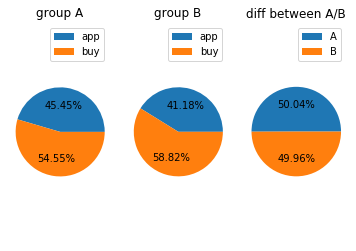

In [14]:
#print ab_counts.last_name
#data = ab_counts.last_name
plt.close('all')

#group A
plt.subplot(1,3,1)
plt.pie([2504/250, 2504/200], autopct='%0.2f%%')
plt.legend(['app','buy'])
plt.title("group A")
plt.axis('equal')

#group B
plt.subplot(1,3,2)
plt.pie([2500/325, 2500/250], autopct='%0.2f%%')
plt.legend(['app','buy'])
plt.title("group B")
plt.axis('equal')

#overview
plt.subplot(1,3,3)
plt.pie([2504, 2500], autopct='%0.2f%%')
plt.legend(['A','B'])
plt.title("diff between A/B")
plt.axis('equal')

plt.show()
plt.savefig('ab_test_pie_chart_kevin.png')
plt.close('all')

In [15]:
print ab_counts.first_name.values
print type(ab_counts.first_name.values)
#I did not know that the ".values" is what outputs
#the values in a numpy form !

[2504 2500]
<type 'numpy.ndarray'>


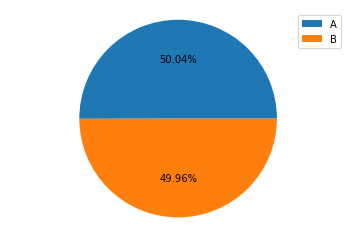

In [16]:
#this is what the project wants,
#there is a difference between including labels in the pie
#and having legend ! but they get the message through
#I prefer legend, because of the more scientific approach
plt.pie(ab_counts.first_name.values, autopct='%0.2f%%')
plt.legend(['A', 'B'])
plt.axis('equal')
plt.savefig('ab_test_pie_chart.png')
plt.show()
#IMPORTANT to put show() command after the savefig

## Step 4: Who picks up an application?

Recall that the sign-up process for MuscleHub has several steps:
1. Take a fitness test with a personal trainer (only Group A)
2. Fill out an application for the gym
3. Send in their payment for their first month's membership

Let's examine how many people make it to Step 2, filling out an application.

Start by creating a new column in `df` called `is_application` which is `Application` if `application_date` is not `None` and `No Application`, otherwise.

In [17]:
#print df.is_application.head(5)
df['is_application'] = df.application_date.apply(lambda x: 'No Application' if x == None else 'Application')
df.head(5)

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application
0,Kim,Walter,female,KimWalter58@gmail.com,7-1-17,2017-07-03,None,None,A,No Application
1,Tom,Webster,male,TW3857@gmail.com,7-1-17,2017-07-02,None,None,A,No Application
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04,B,Application
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application
4,Roberta,Best,female,RB6305@hotmail.com,7-1-17,2017-07-02,None,None,A,No Application


Now, using `groupby`, count how many people from Group A and Group B either do or don't pick up an application.  You'll want to group by `ab_test_group` and `is_application`.  Save this new DataFrame as `app_counts`

In [18]:
app_counts = df.groupby(['ab_test_group', 'is_application']).count().reset_index()
#app_counts
#I had some trouble caused by reset_index() A, A, B, B only existed like A,empty,B,empty caused pivot issues
#we are only interested in the first 3 columns
# .first_name can be added after groupby if you prefer...
#app_counts = df.groupby(['ab_test_group', 'is_application'])['first_name'].count().reset_index()
#app_counts

We're going to want to calculate the percent of people in each group who complete an application.  It's going to be much easier to do this if we pivot `app_counts` such that:
- The `index` is `ab_test_group`
- The `columns` are `is_application`
Perform this pivot and save it to the variable `app_pivot`.  Remember to call `reset_index()` at the end of the pivot!

In [19]:
app_pivot = app_counts.pivot(columns="is_application",index="ab_test_group",values="last_name").reset_index()

Define a new column called `Total`, which is the sum of `Application` and `No Application`.

In [20]:
app_pivot['Total'] = app_pivot['Application'] + app_pivot['No Application']
app_pivot

is_application,ab_test_group,Application,No Application,Total
0,A,250,2254,2504
1,B,325,2175,2500


Calculate another column called `Percent with Application`, which is equal to `Application` divided by `Total`.

In [21]:
app_pivot['Percent with Application'] = app_pivot['Application'] / app_pivot['Total']
app_pivot

is_application,ab_test_group,Application,No Application,Total,Percent with Application
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


It looks like more people from Group B turned in an application.  Why might that be?

We need to know if this difference is statistically significant.

Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

In [22]:
from scipy.stats import chi2_contingency

In [23]:
#so the question is if the relation between A and B is significant ?
#the data is categorical type, between yes application filled vs not filled
#either we use the binomial test or a chi square test
#there are 2 datasets with each 2 categories, so we need to use chi square
# Ho: 
# Contingency table
#           Application | No Application
# --------+-------------+----------------
# group A | 250         | 2254			total = 2504 (10%)
# group B | 325         | 2175			total = 2500 (13%)
# 
# x = [[250, 2254],
#      [325, 2175]]

x = [app_pivot['Application'], app_pivot['No Application']]
chi2, pval, dof, expected = chi2_contingency(x)
if pval < 0.05:
    print "Ho is rejected (A & B are different), pval = ", pval
else:
    print "Ho is accepted (A & B are the same), pval = ", pval

Ho is rejected (A & B are different), pval =  0.000964782760072


## Step 5: Who purchases a membership?

Of those who picked up an application, how many purchased a membership?

Let's begin by adding a column to `df` called `is_member` which is `Member` if `purchase_date` is not `None`, and `Not Member` otherwise.

In [24]:
df['is_member'] = df.purchase_date.apply(lambda x: "Not Member" if x == None else "Member")
df.head(5)

,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
0,Kim,Walter,female,KimWalter58@gmail.com,7-1-17,2017-07-03,None,None,A,No Application,Not Member
1,Tom,Webster,male,TW3857@gmail.com,7-1-17,2017-07-02,None,None,A,No Application,Not Member
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04,B,Application,Member
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
4,Roberta,Best,female,RB6305@hotmail.com,7-1-17,2017-07-02,None,None,A,No Application,Not Member


Now, let's create a DataFrame called `just_apps` that contains only people who picked up an application.

In [25]:
print df.shape
just_apps = df[df.is_application == 'Application']
print just_apps.shape
just_apps.head(5)

(5004, 11)
(575, 11)


,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
2,Edward,Bowen,male,Edward.Bowen@gmail.com,7-1-17,None,2017-07-04,2017-07-04,B,Application,Member
3,Marcus,Bauer,male,Marcus.Bauer@gmail.com,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Application,Member
9,Salvador,Cardenas,male,SCardenas1980@gmail.com,7-1-17,2017-07-07,2017-07-06,None,A,Application,Not Member
11,Valerie,Munoz,female,VMunoz1998@gmail.com,7-1-17,2017-07-03,2017-07-05,2017-07-06,A,Application,Member
35,Michael,Burks,male,MB9820@gmail.com,7-1-17,None,2017-07-07,2017-07-13,B,Application,Member


Great! Now, let's do a `groupby` to find out how many people in `just_apps` are and aren't members from each group.  Follow the same process that we did in Step 4, including pivoting the data.  You should end up with a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `member_pivot`.

In [26]:
member_counts = just_apps.groupby(['is_member', 'ab_test_group']).count().reset_index()
member_counts

,is_member,ab_test_group,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date,is_application
0,Member,A,200,200,200,200,200,200,200,200,200
1,Member,B,250,250,250,250,250,0,250,250,250
2,Not Member,A,50,50,50,50,50,50,50,0,50
3,Not Member,B,75,75,75,75,75,0,75,0,75


In [27]:
member_pivot = member_counts.pivot(columns='is_member', index='ab_test_group', values='last_name').reset_index()
member_pivot

is_member,ab_test_group,Member,Not Member
0,A,200,50
1,B,250,75


In [28]:
member_pivot['Total'] = member_pivot['Member'] + member_pivot['Not Member']
member_pivot['Percent Purchase'] = member_pivot['Member'] / member_pivot['Total']
member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,50,250,0.800000
1,B,250,75,325,0.769231


It looks like people who took the fitness test were more likely to purchase a membership **if** they picked up an application.  Why might that be?

Just like before, we need to know if this difference is statistically significant.  Choose a hypothesis tests, import it from `scipy` and perform it.  Be sure to note the p-value.
Is this result significant?

In [29]:
#so the question is if the relation between A and B is significant ?
#the data is categorical type, between yes became a member vs not became a member
#either we use the binomial test or a chi square test
#there are 2 datasets(A, B) with each 2 categories(member, not member),
#so we need to use chi square
# Ho: ...
# Ha: ...
# Contingency table
#           Member | Not Member
# --------+--------+----------------
# group A | 200    | 50			total = 250 (80%)
# group B | 250    | 75			total = 325 (77%)
# 
# y = [[200, 50],
#      [250, 75]]

y = [member_pivot['Member'], member_pivot['Not Member']]
chi2, pval, dof, expected = chi2_contingency(y)
if pval < 0.05:
    print "Ho is rejected (A & B are different), pval = ", pval
else:
    print "Ho is accepted (A & B are the same), pval = ", pval

Ho is accepted (A & B are the same), pval =  0.432586460511


Previously, we looked at what percent of people **who picked up applications** purchased memberships.  What we really care about is what percentage of **all visitors** purchased memberships.  Return to `df` and do a `groupby` to find out how many people in `df` are and aren't members from each group.  Follow the same process that we did in Step 4, including pivoting the data.  You should end up with a DataFrame that looks like this:

|is_member|ab_test_group|Member|Not Member|Total|Percent Purchase|
|-|-|-|-|-|-|
|0|A|?|?|?|?|
|1|B|?|?|?|?|

Save your final DataFrame as `final_member_pivot`.

In [30]:
final_count = df.groupby(['is_member', 'ab_test_group']).count().reset_index()
#final_count.head(5)
final_member_pivot = final_count.pivot(columns='is_member',index='ab_test_group', values='visit_date').reset_index()
final_member_pivot['Total'] = final_member_pivot.Member + final_member_pivot['Not Member']
final_member_pivot['Percent Purchase'] = final_member_pivot.Member / final_member_pivot.Total
final_member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,2304,2504,0.079872
1,B,250,2250,2500,0.100000


In [31]:
#we want to compare all 5004 users versus 450 puchases in each category A and B
#check out ab_counts for a clear overview, notice there are 2504 fitness tests done, but 0 in B
#confusion! purchase and membership is the same... or not
ab_counts

,ab_test_group,first_name,last_name,gender,email,visit_date,fitness_test_date,application_date,purchase_date
0,A,2504,2504,2504,2504,2504,2504,250,200
1,B,2500,2500,2500,2500,2500,0,325,250


Previously, when we only considered people who had **already picked up an application**, we saw that there was no significant difference in membership between Group A and Group B.

Now, when we consider all people who **visit MuscleHub**, we see that there might be a significant different in memberships between Group A and Group B.  Perform a significance test and check.

In [32]:
#so the question is if the relation between A and B is significant ?
#the data is categorical type, between yes became a member vs not became a member vs all members
#either we use the binomial test or a chi square test
#there are 2 datasets(A, B) with each 2 categories(member, not member),
#so we need to use chi square
# Ho: ...
# Ha: ...
# Contingency table
#           Member | Not Member
# --------+--------+----------------
# group A | 200    | 2304			total = 2504 (9%)
# group B | 250    | 2250			total = 2500 (10%)
# 
# z = [[200, 2304],
#      [250, 2250]]

z = [final_member_pivot['Member'], final_member_pivot['Not Member']]
chi2, pval, dof, expected = chi2_contingency(z)
if pval < 0.05:
    print "Ho is rejected (A & B are different), pval = ", pval
else:
    print "Ho is accepted (A & B are the same), pval = ", pval

Ho is rejected (A & B are different), pval =  0.0147241146458


## Step 6: Summarize the acquisition funel with a chart

We'd like to make a bar chart for Janet that shows the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:
- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

Create one plot for **each** of the three sets of percentages that you calculated in `app_pivot`, `member_pivot` and `final_member_pivot`.  Each plot should:
- Label the two bars as `Fitness Test` and `No Fitness Test`
- Make sure that the y-axis ticks are expressed as percents (i.e., `5%`)
- Have a title

In [33]:
app_pivot

is_application,ab_test_group,Application,No Application,Total,Percent with Application
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


In [34]:
dataset = app_pivot['Percent with Application'].values*100
print dataset

[  9.98402556  13.        ]


/home/beire/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


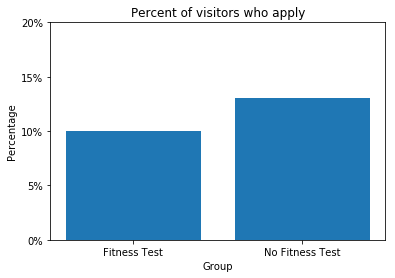

In [35]:
plt.bar(0, dataset[0])
plt.bar(1, dataset[1])
plt.title("Percent of visitors who apply")
plt.xlabel("Group")
plt.ylabel("Percentage")
plt.legend(['Fitness Test', 'No Fitness Test'], loc='lower right')
ax1 = plt.subplot()
ax1.set_xticks(range(len(dataset)))
ax1.set_xticklabels(app_pivot.ab_test_group)
ax1.set_yticks([0,100])
ax1.set_yticklabels(['0%','100%'])
#plt.show()
plt.close('all')

#this code generates a Warning message,
#see below for the fix
ax1 = plt.subplot()
plt.bar(range(len(app_pivot)),
        app_pivot['Percent with Application'].values*100)
plt.title("Percent of visitors who apply")
plt.xlabel("Group")
plt.ylabel("Percentage")
ax1.set_xticks(range(len(app_pivot)))
ax1.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax1.set_yticks([0, 5, 10, 15, 20])
ax1.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.savefig('percent_visitors_apply.png')
plt.show()

In [36]:
#member_pivot
dataset = member_pivot['Percent Purchase']*100
print dataset.values

[ 80.          76.92307692]


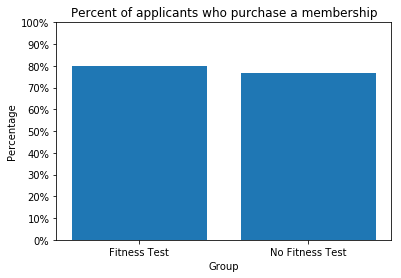

In [37]:
plt.bar(0, dataset[0])
plt.bar(1, dataset[1])
plt.title("Percent of applicants who purchase a membership")
plt.xlabel("Group")
plt.ylabel("Percentage")
plt.legend(['Fitness Test', 'No Fitness Test'], loc='lower right')
ax1 = plt.subplot()
ax1.set_xticks(range(len(dataset)))
ax1.set_xticklabels(app_pivot.ab_test_group)
ax1.set_yticks([0,100])
ax1.set_yticklabels(['0%','100%'])
#plt.show()
plt.close('all')

#this code generates a Warning message,
#see below for the fix
ax1 = plt.subplot()
plt.bar(range(len(member_pivot)),
        member_pivot['Percent Purchase'].values*100)
plt.title("Percent of applicants who purchase a membership")
plt.xlabel("Group")
plt.ylabel("Percentage")
ax1.set_xticks(range(len(app_pivot)))
ax1.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax1.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
ax1.set_yticklabels(['0%','10%','20%','30%','40%','50%','60%', '70%', '80%', '90%', '100%'])
plt.savefig('percent_apply_purchase.png')
plt.show()

In [38]:
#final_member_pivot
dataset = final_member_pivot['Percent Purchase'].values*100
print dataset

[  7.98722045  10.        ]


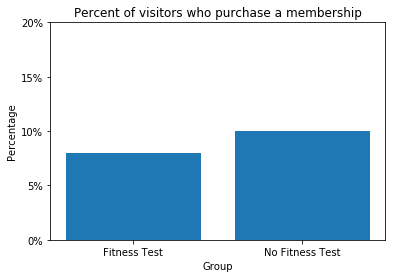

In [39]:
plt.bar(0, dataset[0])
plt.bar(1, dataset[1])
plt.title("Percent of visitors who purchase a membership")
plt.xlabel("Group")
plt.ylabel("Percentage")
plt.legend(['Fitness Test', 'No Fitness Test'], loc='lower right')
ax1 = plt.subplot()
ax1.set_xticks(range(len(dataset)))
ax1.set_xticklabels(app_pivot.ab_test_group)
ax1.set_yticks([0,100])
ax1.set_yticklabels(['0%','100%'])
#plt.show()
plt.close('all')

#this code generates a Warning message,
#see below for the fix
ax1 = plt.subplot()
plt.bar(range(len(final_member_pivot)),
        final_member_pivot['Percent Purchase'].values*100)
plt.title("Percent of visitors who purchase a membership")
plt.xlabel("Group")
plt.ylabel("Percentage")
ax1.set_xticks(range(len(app_pivot)))
ax1.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax1.set_yticks([0, 5, 10, 15, 20])
ax1.set_yticklabels(['0%','5%','10%','15%','20%'])
plt.show()
plt.savefig('percent_visitors_purchase.jpg')